In [16]:
!pip install fastai

  Using cached fastai-2.7.14-py3-none-any.whl.metadata (9.1 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.5.29-py3-none-any.whl.metadata (3.5 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached spacy-3.7.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp311-cp311-macosx_10_9_x86_64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp311-cp311-macosx_10_9_x86_64.whl.metadata (8.4 kB)
  Using cached preshed-3.0.9-cp311-cp311-macosx_10_9_x86_64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata (15 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp311-cp311-macosx_10_9_x86_64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-a

In [28]:
import pandas  as pd
import numpy   as np
from fastai.tabular.all import *



# EDA

In [30]:
df = pd.read_csv('../price/hourly_price.csv' )
df['PriceChange'] = df['PriceEnd'] - df['priceStart']
df.fillna(0, inplace=True)
df

,PriceEnd,priceStart,SumReTweetCount,SumReplyCount,SumLikeCount,SumQuoteCount,SumImpressionCount,SumVolume,SumSentimentScore,WeightedSentimentScore,PriceChange
0,16585.59,16603.55,36794,3547,26812,863,36573,3.174002e+10,129.3542,17950.5160,-17.96
1,16665.87,16687.11,10051,5527,71632,1007,0,1.639211e+11,311.3932,61069.1221,-21.24
2,16825.72,16841.70,37453,14513,38804,8233,0,0.000000e+00,245.3676,35751.2942,-15.98
3,16684.15,16679.29,92719,8295,39296,1651,0,1.374111e+10,210.2748,31552.7521,4.86
4,16953.46,16957.19,31267,7155,34689,13325,0,0.000000e+00,214.2104,29814.3005,-3.73
...,...,...,...,...,...,...,...,...,...,...,...
569,23565.15,23655.27,108097,23411,96484,2268,2459415,1.546633e+11,344.1638,125793.6886,-90.12
570,23269.66,23085.55,56475,9822,119653,2327,3599174,6.233997e+10,426.6023,94359.0918,184.11
571,23082.69,23117.90,51506,6948,54842,741,1618931,1.356599e+11,333.4344,63971.3325,-35.21
572,23202.79,23566.37,60437,12808,71140,2183,1712431,3.640971e+11,284.8821,77012.1688,-363.58


# Data Preprocessing

In [15]:
df_input = df.iloc[:, 1:]

df_input.describe()

,priceStart,SumReTweetCount,SumReplyCount,SumLikeCount,SumQuoteCount,SumImpressionCount,SumVolume,SumSentimentScore,WeightedSentimentScore
count,573.000000,5.740000e+02,574.000000,5.740000e+02,574.000000,5.740000e+02,3.170000e+02,574.000000,5.740000e+02
mean,19601.156981,5.321516e+04,17075.242160,1.044915e+05,3720.351916,1.294936e+06,9.506218e+10,284.036937,1.053618e+05
std,2576.507062,8.790591e+04,35996.771268,2.573547e+05,11571.317555,3.006728e+06,1.278191e+11,585.403691,3.631351e+05
min,16585.340000,8.880000e+02,193.000000,1.016000e+03,10.000000,0.000000e+00,2.430075e+08,34.754100,-1.067074e+05
25%,16942.340000,1.019900e+04,2571.250000,1.520900e+04,242.250000,0.000000e+00,1.703216e+10,198.713525,1.417600e+04
50%,19019.290000,2.769250e+04,6322.500000,3.529650e+04,716.500000,3.158215e+05,4.558151e+10,247.060700,3.550589e+04
75%,22669.130000,6.201800e+04,18099.000000,9.490275e+04,2612.250000,1.503852e+06,1.238854e+11,307.690575,9.668553e+04
max,23655.270000,1.108192e+06,417453.000000,4.253467e+06,138913.000000,4.443794e+07,1.019672e+12,14081.621900,7.755582e+06


In [14]:
df_labels = df.iloc[:,:1]
df_labels.describe()

,PriceEnd
count,573.000000
mean,19605.798743
std,2573.620200
min,16585.590000
25%,16942.110000
50%,19038.500000
75%,22674.660000
max,23569.760000


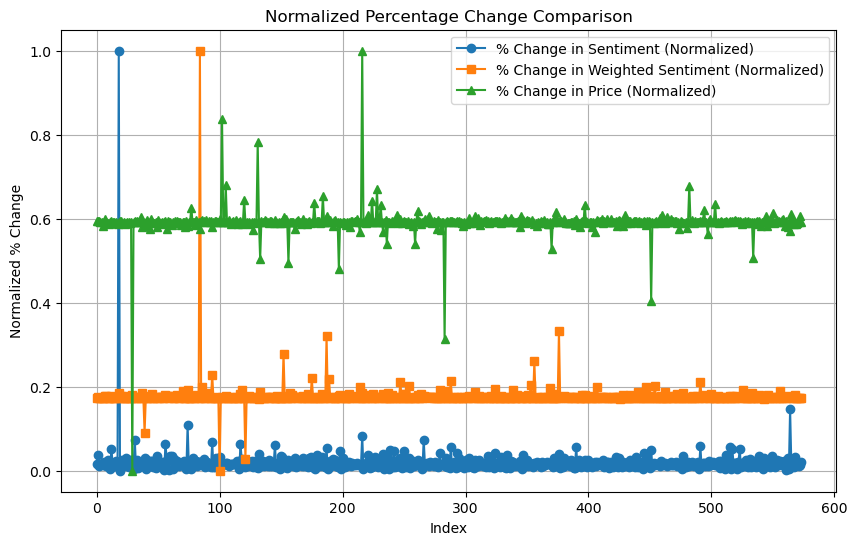

In [29]:

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


def plot_normalized_percentage_changes(df):
    # Convert the input data to a DataFrame

    
    # Calculate percentage changes for Sentiment, Weighted Sentiment, and Price
    df['SentimentPctChange'] = df['SumSentimentScore'].pct_change() * 100
    df['WeightedSentimentPctChange'] = df['WeightedSentimentScore'].pct_change() * 100
    df['PricePctChange'] = df['PriceChange'].pct_change() * 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    
    # Normalizing the percentage changes
    scaler = MinMaxScaler()
    percentage_changes = df[['SentimentPctChange', 'WeightedSentimentPctChange', 'PricePctChange']]
    normalized_changes = scaler.fit_transform(percentage_changes)
    
    # Creating a new DataFrame for the normalized data
    normalized_df = pd.DataFrame(normalized_changes, columns=['SentimentPctChange', 'WeightedSentimentPctChange', 'PricePctChange'])
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(normalized_df.index, normalized_df['SentimentPctChange'], label='% Change in Sentiment (Normalized)', marker='o')
    plt.plot(normalized_df.index, normalized_df['WeightedSentimentPctChange'], label='% Change in Weighted Sentiment (Normalized)', marker='s')
    plt.plot(normalized_df.index, normalized_df['PricePctChange'], label='% Change in Price (Normalized)', marker='^')

    plt.title('Normalized Percentage Change Comparison')
    plt.xlabel('Index')
    plt.ylabel('Normalized % Change')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test the function with the provided data
plot_normalized_percentage_changes(df)

